In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import gridspec
import talib as ta
from talib import abstract

In [2]:
raw_data = pd.read_excel('data1.xlsx')



In [3]:
raw_data['隔日漲跌價'] = raw_data['收盤價'].shift(-1) - raw_data['收盤價']
raw_data['隔日收盤'] = raw_data['收盤價'].shift(-1)
raw_data['隔日漲跌'] = raw_data['隔日漲跌價'].apply(lambda x: 1 if x > 0 else 0)
raw_data.columns

Index(['交易日期', '到期月份(週別)', '開盤價', '最高價', '最低價', '收盤價', '漲跌價', '漲跌%', '成交量',
       '隔日漲跌價', '隔日收盤', '隔日漲跌'],
      dtype='object')

In [4]:
ohlcv = raw_data[['開盤價', '最高價', '最低價', '收盤價','成交量']]
ohlcv.columns = ['open', 'high', 'low', 'close', 'volume']

In [5]:
df_KD = abstract.STOCH(ohlcv, fastk_period=9, slowk_period=3, slowd_period=3)

In [6]:
df_KD['K-D'] = df_KD['slowk'] - df_KD['slowd']
df_KD

,slowk,slowd,K-D
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
3827,37.418793,43.290281,-5.871488
3828,27.582175,36.054986,-8.472811
3829,27.095166,30.698711,-3.603545
3830,24.619500,26.432280,-1.812780


In [7]:
df_KD.isna().sum()

slowk    12
slowd    12
K-D      12
dtype: int64

In [8]:
df_BBANDS = abstract.BBANDS(ohlcv, timeperiod=20, nbdevup=2.0, nbdevdn=2.0, matype=0)

In [9]:
df_BBANDS.isna().sum()

upperband     19
middleband    19
lowerband     19
dtype: int64

In [10]:
df_BBANDS['band_width'] = df_BBANDS['upperband'] - df_BBANDS['lowerband']

In [11]:
def BIAS(close, period):
    return (close - close.rolling(period).mean()) / close.rolling(period).mean()

df_bias20 = BIAS(raw_data[['收盤價']].copy(), 20)
df_bias20 

,收盤價
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3827,-0.005587
3828,-0.017725
3829,-0.018714
3830,-0.007263


In [12]:
df_bias20.rename(columns={"收盤價": "BIAS20"}, inplace=True)

In [13]:
df_bias60 = BIAS(raw_data[['收盤價']].copy(), 60)
df_bias60.rename(columns={"收盤價": "BIAS60"}, inplace=True)

In [14]:
df_bias5 = BIAS(raw_data[['收盤價']].copy(), 5)
df_bias5.rename(columns={"收盤價": "BIAS5"}, inplace=True)

In [15]:
df = raw_data.copy()
df['隔日收盤'] = df['收盤價'].shift(-1)
def calculate_next_day_movement(row):
    return 1 if row['隔日收盤'] - row['收盤價'] > 0 else 0

# Apply the function to create the '隔日漲跌' column
df['隔日漲跌'] = df.apply(lambda row: calculate_next_day_movement(row), axis=1)



In [16]:
df_OBV = abstract.OBV(ohlcv)

In [17]:
df_OBV = pd.DataFrame(df_OBV, columns=['OBV'])

<AxesSubplot: ylabel='Frequency'>

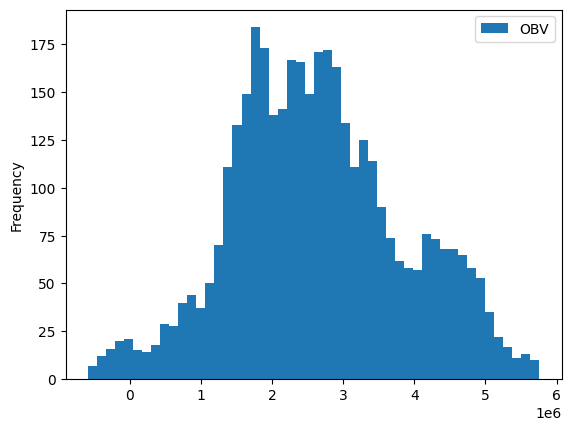

In [18]:
pd.DataFrame(df_OBV).plot(kind='hist', bins=50)

In [19]:
df_RSI = abstract.RSI(ohlcv)
df_RSI = pd.DataFrame(df_RSI, columns=['RSI'])

In [20]:
df_MACD = abstract.MACD(ohlcv)
df_MACD

,macd,macdsignal,macdhist
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
3827,-91.901233,-88.925049,-2.976183
3828,-103.170329,-91.774105,-11.396224
3829,-114.413406,-96.301965,-18.111441
3830,-110.191733,-99.079919,-11.111814


In [21]:
df = pd.concat([raw_data, df_KD, df_BBANDS, df_bias20, df_bias60, df_bias5, df_OBV, df_MACD, df_RSI], axis=1)
df.rename({'           0' : 'OBV', '           1': 'RSI'}, inplace=True)
df.columns

Index(['交易日期', '到期月份(週別)', '開盤價', '最高價', '最低價', '收盤價', '漲跌價', '漲跌%', '成交量',
       '隔日漲跌價', '隔日收盤', '隔日漲跌', 'slowk', 'slowd', 'K-D', 'upperband',
       'middleband', 'lowerband', 'band_width', 'BIAS20', 'BIAS60', 'BIAS5',
       'OBV', 'macd', 'macdsignal', 'macdhist', 'RSI'],
      dtype='object')

In [22]:
df.dropna(inplace=True)
df.to_csv('data_new.csv', index=False)